# EDA

In this notebook we will analyze the data in order to have a better understanding of the features in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('train-balanced-sarcasm.csv', parse_dates=['date', 'created_utc'])
df.shape

(1010826, 10)

Variables:
- label: Sarcastic or not (binary)
- comment: Reply to a Parent Reddit comment
- author: Person who commented
- subreddit: Commented under which subreddit
- ups: Number of upvotes
- downs: Number of downvotes
- score: ups-downs
- date: Commented date
- created_utc: Commented time in the UTC Timezone
- parent_comment: The Parent Reddit comment to which sarcastic replies are made

In [4]:
df.head(2)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10-01,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11-01,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...


## General summary statistics

In [7]:
df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


The three following variables have values to consider:
- ups: Number of upvotes
- downs: Number of downvotes
- score: ups - downs

In [8]:
df.ups.unique(), df.downs.unique(), df.score.unique()

(array([  -1,    3,    0, ...,  -93, -172, 1015], dtype=int64),
 array([-1,  0], dtype=int64),
 array([   2,   -4,    3, ...,  -93, -172, 1015], dtype=int64))

The score can be negative if there are more downs than ups.
If we consider the downs as negative values, those are okay being negative, but ups should only be positives.

In [9]:
print('Total amount of rows:', len(df))
print('Rows with incoherent ups, downs and scores:', sum(df.score-(np.abs(df.ups)-np.abs(df.downs))!=0)/len(df)*100,'%')

Total amount of rows: 1010826
Rows with incoherent ups, downs and scores: 20.070615516419245 %


20% of the data has incoherent score, ups and downs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010826 non-null int64
comment           1010773 non-null object
author            1010826 non-null object
subreddit         1010826 non-null object
score             1010826 non-null int64
ups               1010826 non-null int64
downs             1010826 non-null int64
date              1010826 non-null datetime64[ns]
created_utc       1010826 non-null datetime64[ns]
parent_comment    1010826 non-null object
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 77.1+ MB


## Missing values

In [11]:
df.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

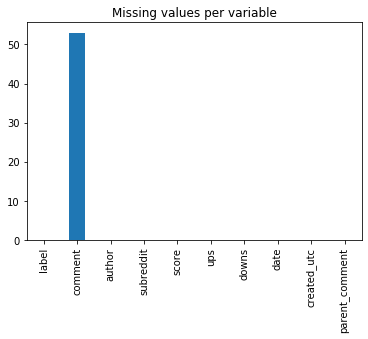

In [12]:
df.isnull().sum().plot.bar()
plt.title('Missing values per variable');

The only variable with missing values is "comment"

## Unique values

In [15]:
df.nunique()

label                   2
comment            962294
author             256561
subreddit           14878
score                1291
ups                  1171
downs                   2
date                   96
created_utc       1004689
parent_comment     984286
dtype: int64

## Distributions

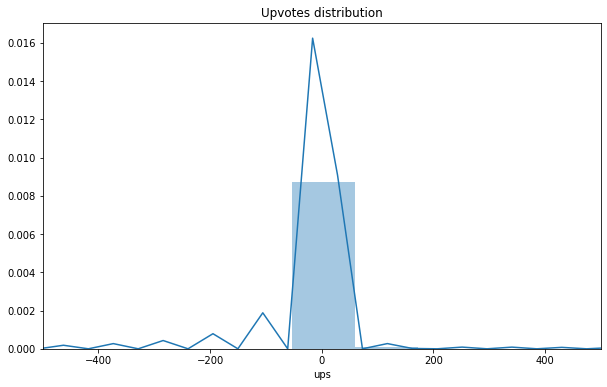

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df.ups)
plt.title('Upvotes distribution')
plt.xlim(-500,500);

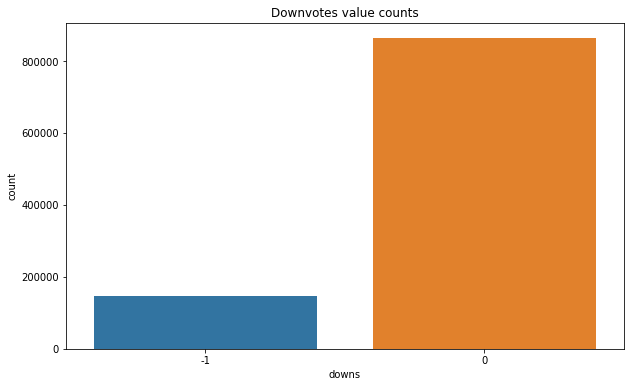

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df.downs)
plt.title('Downvotes value counts');

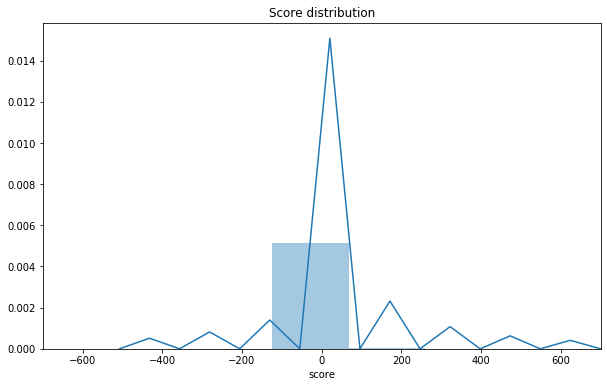

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df.score)
plt.xlim(-700,700);
plt.title('Score distribution');

### Value counts per category for some categorical features

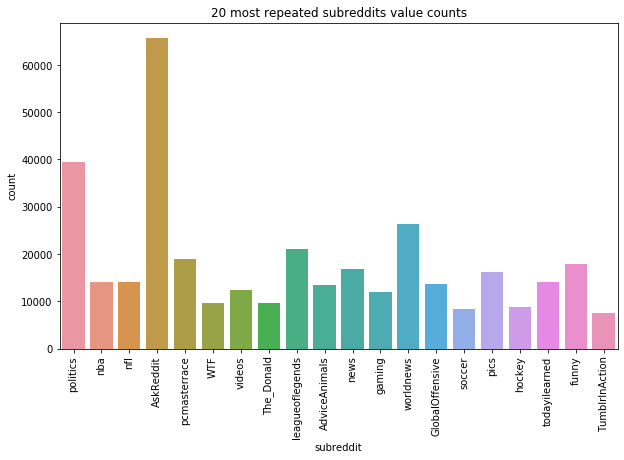

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df[df.subreddit.isin(df.subreddit.value_counts()[:20].index)].subreddit)
plt.title('20 most repeated subreddits value counts')
plt.xticks(rotation=90);

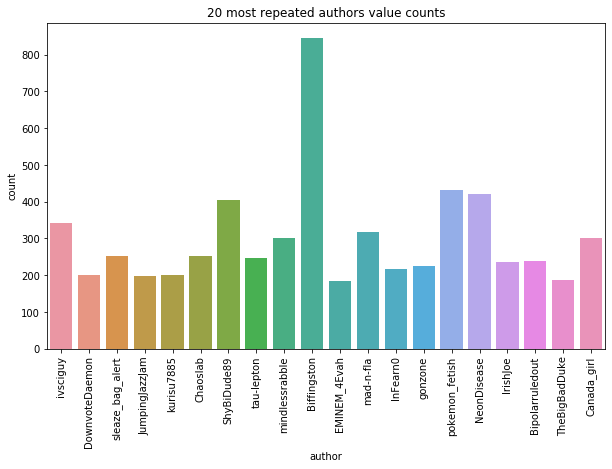

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df[df.author.isin(df.author.value_counts()[:20].index)].author)
plt.title('20 most repeated authors value counts')
plt.xticks(rotation=90);

### Distribution of "score" against the target variable

<Figure size 720x432 with 0 Axes>

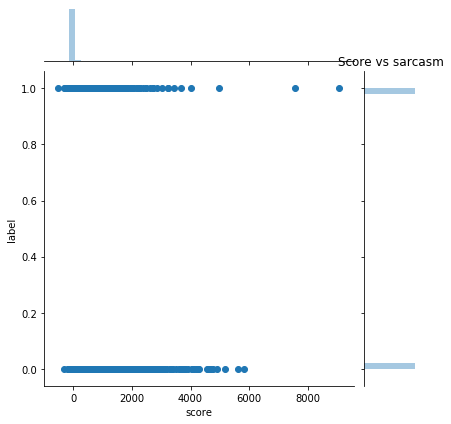

In [22]:
plt.figure(figsize=(10,6))
sns.jointplot("score", "label", data=df, kind='scatter')
plt.title('Score vs sarcasm')
plt.show();

### Value counts of for each subreddit per label

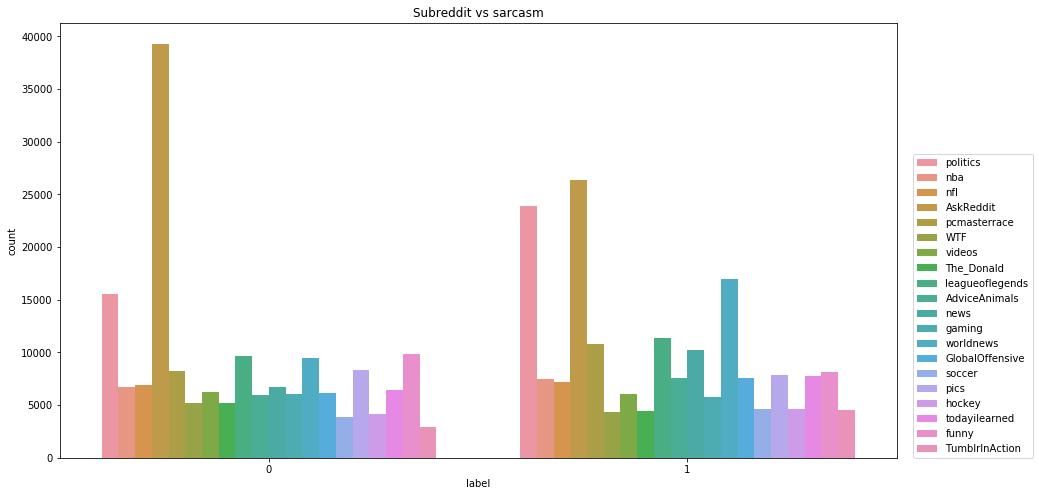

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x = df[df.subreddit.isin(df.subreddit.value_counts()[:20].index)].label,  hue = df[df.subreddit.isin(df.subreddit.value_counts()[:20].index)].subreddit, data=df);
plt.legend(loc=(1.02,0))
plt.title('Subreddit vs sarcasm');

### Value counts of for each author per label

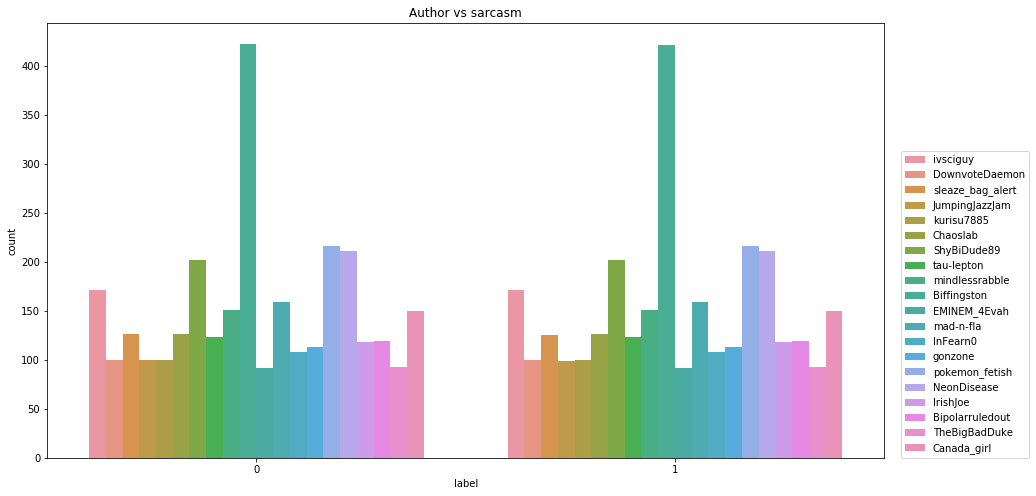

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x = df[df.author.isin(df.author.value_counts()[:20].index)].label,  hue = df[df.author.isin(df.author.value_counts()[:20].index)].author, data=df);
plt.legend(loc=(1.02,0))
plt.title('Author vs sarcasm');

The plots above don't show a clear correlation

**Correlation matrix**

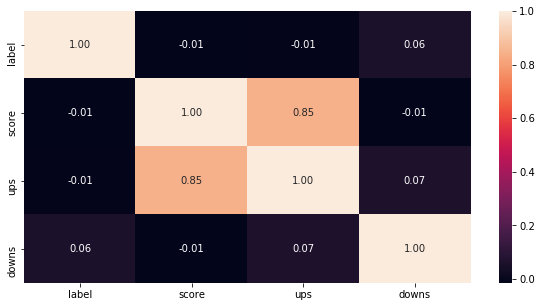

In [26]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f")
ax.set_ylim(4,0);

We see great correlation between the ups and the score, but not between the downs and the score.

## Checking if the dataset is balanced

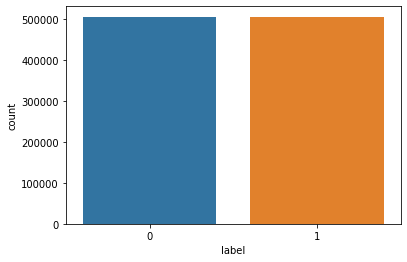

In [28]:
sns.countplot(df['label']);

The set is balanced

## Time series analysis

In [29]:
year = df.date.apply(lambda x: x.year)

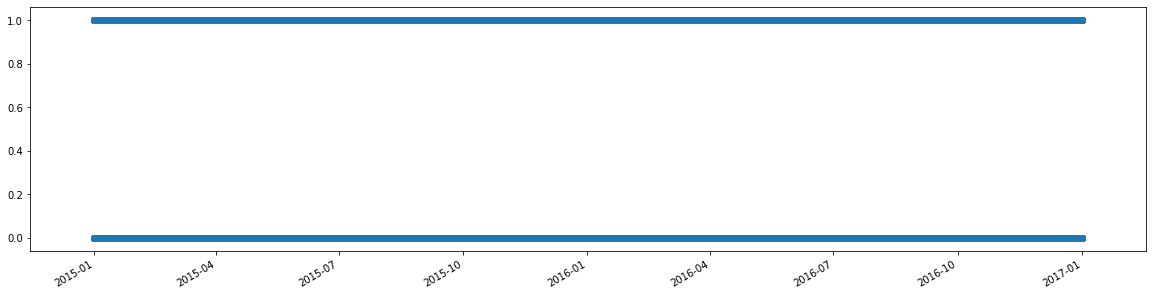

In [30]:
plt.figure(figsize=(20,5))
plt.scatter(df.loc[year.isin([2015, 2016])].created_utc, df.loc[year.isin([2015, 2016])].label)
plt.gcf().autofmt_xdate()

In [31]:
label_counts = df.groupby(['date','label']).agg('count').score.reset_index('label')
date_labels = label_counts[label_counts.label==0].reset_index('date').date
label_counts.head()

,label,score
date,,
2009-01-01,0,32
2009-01-01,1,72
2009-02-01,0,32
2009-02-01,1,57
2009-03-01,0,35


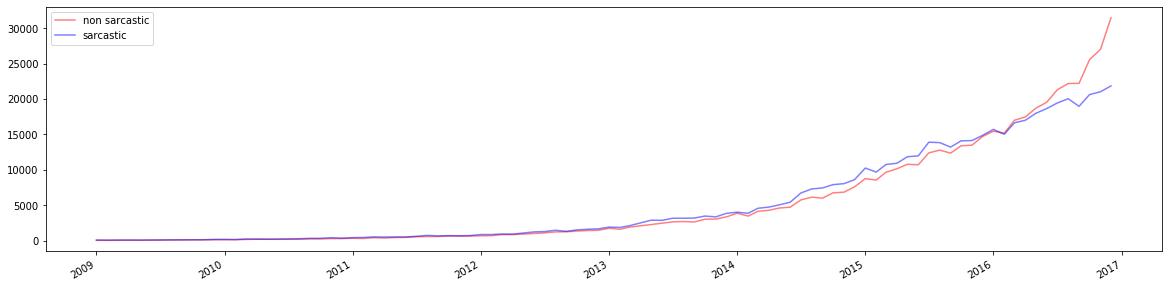

In [32]:
plt.figure(figsize=(20,5))
plt.plot(date_labels, label_counts[label_counts.label==0].score, label='non sarcastic', c='r', alpha=0.5)
plt.plot(date_labels, label_counts[label_counts.label==1].score, label='sarcastic', c='b', alpha=0.5)
plt.legend()
plt.gcf().autofmt_xdate()

Doesn't seem to be much difference with time either.

**According to the analysis performed above, it seems that the text itself is practically the only relevant feature.**